In [1]:
%matplotlib inline
import os 
import pandas as pd 
import numpy as np 
import scipy.stats as ss 
import seaborn as sns 

datadir = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSM/Sept_27'

measures = ['Puta', 'Pall', 'Thal', 'Accu', 'Amyg', 'Hipp', 'RN', 'SN','STN', #'Caud', 
            'GPi' , 'GPe' , 'DN']

drop_c = ['LL5T', 'WSKT', 'FA2T', 'SC1T']
drop_p = ['HSPP', 'AA8P', 'CB4P', 'LA9P','RA9P', 'SA5U', 'RMJP', 'HHQP']
#drop_c = []
drop_p = ['HSPP', 'THCP', 'CB4P', 'LA9P', 'RA9P', 'SA5U', 'AA8P','RMJP', 'HHQP']
#drop_p = ['CB4P','RA9P','RMJP','HHQP','HSPP','KDDP','THCP','SA5U','CM5P', 'AA8P'] #mahal

In [2]:
def read_df(img, population, study_id):
    quant = 'median'
    df = pd.read_csv(os.path.join(datadir, '%s_%s_%s_%s.csv'%(img, quant, population, study_id)), index_col = 0)
    df['Gender']  = df['Gender'].map({' F': 1, ' M': 0})
    return df 

controls_a = read_df('QSM', 'controls', 'a').drop(drop_c, axis = 0)
patients_a = read_df('QSM', 'patients', 'a').drop(drop_p, axis = 0)


In [3]:
controls_a

,Age,Gender,GM,WM,CSF,SNR_UNI,CNR_UNI,FBER_UNI,EFC_UNI,FWHM_UNI,...,GPi,ATAG_STR,BrainStem,BasalGanglia,L_DN,R_DN,DN,MRS_ACC,MRS_THA,MRS_STR
SMVX,19,0,-0.021270,-0.023030,-0.021270,2.961573,1.986188,-1.411275,NaN,3.38441,...,0.031489,-0.003946,0.028678,0.015354,-0.014377,-0.001143,-0.007760,-0.042900,-0.033938,-0.023591
SS1X,22,1,-0.027844,-0.032275,-0.027844,2.920712,1.908488,-0.053362,NaN,3.55039,...,-0.004044,-0.007650,-0.004535,0.014271,-0.017716,-0.003928,-0.010822,-0.042135,-0.026092,-0.020137
STQT,23,0,-0.030594,-0.038048,-0.030594,3.226063,2.044617,-0.920848,NaN,3.49255,...,0.006985,0.001567,0.042589,0.017409,0.013512,0.006958,0.010235,-0.046915,-0.041301,-0.041301
HM1X,23,0,-0.020989,-0.024579,-0.020989,2.950008,2.024887,-2.761726,NaN,3.61232,...,0.048912,-0.002602,0.056914,0.023838,-0.013257,-0.021861,-0.017559,-0.045361,-0.035061,-0.031298
TR4T,24,1,-0.025445,-0.028249,-0.025445,2.639337,1.715610,-1.440407,NaN,3.38409,...,0.019134,0.009669,0.042222,0.012825,0.011302,0.002558,0.006930,-0.059062,-0.057757,-0.018854
PAHT,29,0,-0.014322,-0.020939,-0.014322,2.934323,1.822412,0.493031,NaN,3.40005,...,0.031378,0.012360,0.055509,0.025292,-0.012373,-0.008229,-0.010301,-0.023219,-0.020233,-0.007057
GSNT,29,1,-0.045015,-0.054584,-0.045015,2.977413,1.883975,-1.962394,NaN,3.61537,...,-0.022587,-0.006695,0.064376,-0.002072,-0.001437,-0.016340,-0.008889,-0.068858,-0.069546,-0.031306
RJJT,35,1,-0.031548,-0.037460,-0.031548,2.920314,1.900520,-3.028003,NaN,3.59542,...,-0.016827,-0.000028,0.030439,0.018494,0.009461,0.008764,0.009113,-0.044955,-0.028256,-0.017915
KO4T,41,0,-0.024212,-0.025743,-0.024212,2.689452,1.615703,-4.929057,NaN,3.60101,...,0.024363,0.012771,0.111064,0.020535,-0.021483,-0.012737,-0.017110,-0.041474,-0.033428,-0.010941
SDCT,42,1,-0.029516,-0.033938,-0.029516,2.550960,1.554854,-2.672612,NaN,3.80292,...,-0.047614,0.001065,0.017518,0.013140,-0.004020,0.006526,0.001253,-0.051394,-0.049824,-0.030880


In [4]:
def make_ttest(df1,df2):
    df = pd.DataFrame(index= ['Controls', 'Patients', 'Statistic', 'p_val',], columns=measures)
    for measure in measures:
        t_val, p_val = ss.mannwhitneyu(df1[measure], df2[measure])
        
        xval = 1000
        npr  = 4
        df.ix['Controls'][measure] = '%s±%s'%(xval*np.round(np.mean(df1[measure]),npr), 
                                              xval*np.round(np.std(df1[measure]), npr))   
        df.ix['Patients'][measure] = '%s±%s'%(xval*np.round(np.mean(df2[measure]),npr), 
                                              xval*np.round(np.std(df2[measure]), npr))          
        df.ix['Statistic'][measure] = np.round(t_val,2)        
        df.ix['p_val'][measure]     = np.round(p_val,5)
        
        if p_val < 0.05:
            print measure, 'p =', np.round(p_val,3)
    return df.T
         
def make_fdr(df):
    fdr = pd.DataFrame()
    for i in df.index:
        for c in df.columns:
            fdr.ix['%s_%s'%(i,c),'p'] = df.loc[i][c]
    fdr = fdr.dropna()
    fdr = fdr.sort('p')
    
    n_comparisons = len(fdr.index)
    for i, corr in enumerate(fdr.index):
        fdr.ix[corr, 'FDR_threshold'] = np.round((0.05 * (i + 1.) / n_comparisons), 3)
        
    return fdr.reindex()

In [5]:
df_stat = make_ttest(controls_a,patients_a)
df_stat.sort('p_val')

Hipp p = 0.041
STN p = 0.031


,Controls,Patients,Statistic,p_val
STN,-3.4±32.7,-23.5±28.7,137,0.03079
Hipp,-19.0±10.5,-25.5±12.4,142,0.04105
Accu,-24.0±17.5,-30.1±15.4,147,0.05393
GPi,16.0±29.3,-1.7±40.7,155,0.08095
Puta,0.2±16.9,-6.7±18.1,161,0.10714
SN,124.4±31.8,116.7±50.9,171,0.16344
Amyg,-34.1±9.3,-38.3±15.4,174,0.18353
RN,84.7±54.9,65.2±59.5,177,0.2051
Thal,-37.4±12.0,-40.7±12.2,180,0.2281
Pall,82.9±17.4,78.7±23.8,184,0.26091


In [6]:
make_fdr(pd.DataFrame(df_stat.p_val))

,p,FDR_threshold
STN_p_val,0.03079,0.004
Hipp_p_val,0.04105,0.008
Accu_p_val,0.05393,0.013
GPi_p_val,0.08095,0.017
Puta_p_val,0.10714,0.021
SN_p_val,0.16344,0.025
Amyg_p_val,0.18353,0.029
RN_p_val,0.20510,0.033
Thal_p_val,0.22810,0.038
Pall_p_val,0.26091,0.042


In [7]:
df_stat = make_ttest(controls_a,patients_a)
df_stat.sort('p_val')


Hipp p = 0.041
STN p = 0.031


,Controls,Patients,Statistic,p_val
STN,-3.4±32.7,-23.5±28.7,137,0.03079
Hipp,-19.0±10.5,-25.5±12.4,142,0.04105
Accu,-24.0±17.5,-30.1±15.4,147,0.05393
GPi,16.0±29.3,-1.7±40.7,155,0.08095
Puta,0.2±16.9,-6.7±18.1,161,0.10714
SN,124.4±31.8,116.7±50.9,171,0.16344
Amyg,-34.1±9.3,-38.3±15.4,174,0.18353
RN,84.7±54.9,65.2±59.5,177,0.2051
Thal,-37.4±12.0,-40.7±12.2,180,0.2281
Pall,82.9±17.4,78.7±23.8,184,0.26091


In [8]:
make_fdr(pd.DataFrame(df_stat.p_val))

,p,FDR_threshold
STN_p_val,0.03079,0.004
Hipp_p_val,0.04105,0.008
Accu_p_val,0.05393,0.013
GPi_p_val,0.08095,0.017
Puta_p_val,0.10714,0.021
SN_p_val,0.16344,0.025
Amyg_p_val,0.18353,0.029
RN_p_val,0.20510,0.033
Thal_p_val,0.22810,0.038
Pall_p_val,0.26091,0.042


In [9]:
np.mean(patients_a.DN) * 1000

-5.1146578947368422

In [10]:
np.mean(controls_a.DN) * 1000

2.7965909090909093

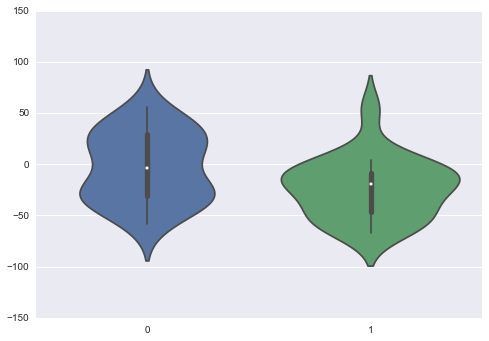

In [11]:
m = 'STN'
data = [controls_a[m] * 1000, patients_a[m]* 1000]
sns.violinplot(data = data)